## 实验：二维码识别

### 实验概要

二维码又称二维条码，常见的二维码为 `QR Code`，QR 全称 Quick Response，是一个近几年来移动设备上超流行的一种编码方式，它比传统的 Bar Code 条形码能存更多的信息，也能表示更多的数据类型。

二维条码/二维码（2-dimensional bar code）是用某种特定的几何图形按一定规律在平面（二维方向上）分布的、黑白相间的、记录数据符号信息的图形；在代码编制上巧妙地利用构成计算机内部逻辑基础的 `0`、`1` 比特流的概念，使用若干个与二进制相对应的几何形体来表示文字数值信息，通过图象输入设备或光电扫描设备自动识读以实现信息自动处理：它具有条码技术的一些共性：每种码制有其特定的字符集；每个字符占有一定的宽度；具有一定的校验功能等。同时还具有对不同行的信息自动识别功能、及处理图形旋转变化点。2016 年 8 月 3 日，支付清算协会向支付机构下发《条码支付业务规范》（征求意见稿），意见稿中明确指出支付机构开展条码业务需要遵循的安全标准。这是央行在 2014 年叫停二维码支付以后首次官方承认二维码支付地位。

二维码种类多种多样，有 QR Code、Data Matrix、Code One 等，日常生活中常用的二维码是 QR 二维码，该二维码样式以及每部分的作用。二维码定点方向有三个较大的 **回** 字形区域用于对二维码进行定位，该区域最大的特别之处在于任何一条经过中心的直线其在黑色和白色区域的长度比值都为 `1：1：3：1：1`。二维码中间具有多个较小的 **回** 字形区域用于二维码的对齐，根据二维码版本和尺寸的不同，对齐区域的数目也不尽相同。

<img src="./img/qr.png" width="60%">

目前，二维码的应用领域主要包括：

- 信息获取（名片、地图、WIFI 密码、资料）
- 网站跳转（跳转到微博、手机网站、网站）
- 广告推送（用户扫码，直接浏览商家推送的视频、音频广告）
- 手机电商（用户扫码、手机直接购物下单）
- 防伪溯源（用户扫码、即可查看生产地；同时后台可以获取最终消费地)
- 优惠促销（用户扫码，下载电子优惠券，抽奖）
- 会员管理（用户手机上获取电子会员信息、VIP 服务）
- 手机支付（扫描商品二维码，通过银行或第三方支付提供的手机端通道完成支付）
- 账号登录（扫描二维码进行各个网站或软件的登录）

### 实验目标

此前，我们使用了二维码作为二值图像的示例。由于二维码识别在 OpenCV 上可以实现快速识别，在本实验中，我们将实现读取二维码检测并读取信息内容。

### 1. 二维码制作

制作二维码最简单的方法便是使用草料二维码进行在线制作：https://cli.im/

<img src="./img/1.jpg" width="70%">

点击生成后，平台自动生成对应的二维码：

<img src="./img/2.jpg" width="70%">

将二维码图片下载到本地后，便可以上传到平台上，使用 OpenCV 进行识别。

### 2. 导入依赖库

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### 3. 读取二维码图像

In [2]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab2/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 读取二维码
# 加载之前生成并上传的二维码图像，注意文件路径以实际存储路径为准
src = cv2.imread("./data/fakelove.png")         
# 将图像转换为灰度图像
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)  

### 4. 初始化二维码检测器

In [3]:
# 设置检测器
qrcoder = cv2.QRCodeDetector()

### 5. 解析二维码信息并输出

OpenCV 使用 `qrcoder.detectAndDecode` 对检测到的二维码图像执行解析，该函数返回一个元组，包含:

- 解码数据
- 找到的二维码的顶点数组
- 经过处理和二值化的 QR 码图像

qrcode information is : 
fake love


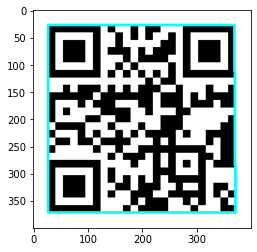

In [16]:
# 检测识别二维码
# 读取灰度二维码图像进行解析
codeinfo, points, straight_qrcode = qrcoder.detectAndDecode(gray) 
result = np.copy(src) # 拷贝一个副本，之后在上面绘制轮廓

# 在二维码图像拷贝副本上绘制锚框
cv2.drawContours(result, [np.int32(points)], 0, (255, 255, 0), 3) 

# 输出识别二维码的信息
print("qrcode information is : \n%s"% codeinfo)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

$\uparrow$ 通过几个简单的操作步骤，我们顺利读取出二维码存储的信息。

### 实验小结

在本实验中，你实现了通过 OpenCV 简单识别并读取二维码的内容。除了草料二维码，还有很多第三库支持通过 Python 生成更为复杂的二维码，譬如：[Amazing-QR](https://github.com/x-hw/amazing-qr) 这个库，如果你有兴趣，可以在本地实验环境中安装，并参考 [官方文档](https://github.com/x-hw/amazing-qr/blob/master/README-cn.md) 实现二维码制作。

#### <font color="#0000dd">练习题</font>

在 OpenCV 的最新版本 (4.5.2 - 暂未在 pypi 发布) 中，已支持通过 `cv.wechat_qrcode_WeChatQRCode` 函数，结合深度学习模型检测并识别微信二维码。代码示例如下：

```python
import cv2

# 初始化微信二维码检测器
detector = cv2.wechat_qrcode_WeChatQRCode("detect.prototxt", 
                                          "detect.caffemodel", 
                                          "sr.prototxt", 
                                          "sr.caffemodel")

img = cv2.imread("WeChatQRCode.jpg")        # 微信二维码图片
res, points = detector.detectAndDecode(img) # 读取检测到的二维码图像及二维码四边形顶点的可选输出数组

# 输出识别结果
print(res, points)
```
初始化微信二维码。它包括两个模型，它们是用 caffe 格式打包的。因此，有 prototxt 和 caffe 模型（总共四个参数），模型可以在 WeChat Computer Vision Team 的 [opencv_3rdparty](https://github.com/WeChatCV/opencv_3rdparty) 项目主页中下载。你可以在 **本地实验环境** 中，譬如：你自己的笔记本电脑。安装 OpenCV 4.5.2 版本（预计 2021 年下半年发布），下载模型文件存储到本地实验环境。根据 [官方文档指引](https://docs.opencv.org/4.5.2/d5/d04/classcv_1_1wechat__qrcode_1_1WeChatQRCode.html)，进行测试。